Linear model with final dataset prepared by Anzhelika 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline

C:\Users\luisf\AppData\Local\Temp\ipykernel_11960\2917017060.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("dates_shift.csv")

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter out the rows where the year is 2022
df = df[df['Date'].dt.year != 2022]

# Filter out rows where 'Country' is either 'RO', 'PL', or 'IT_SACO_DC'
df = df[~df['Country'].isin(['RO', 'PL', 'IT_SACO_DC'])]

# Define the columns to drop
columns_to_drop = ['year_2022', 'Country_RO', 'Country_PL', 'Country_IT_SACO_DC']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)


In [4]:
df.shape

(2748804, 197)

In [5]:
df2 = pd.read_csv("dates_shift_exclude.csv")

In [6]:
df2.shape

(2748804, 197)

In [8]:
X = df.drop(columns=['Unnamed: 0', 'Date', 'Country', 'energy_price', 'energy_price_target'])

# Isolate the target variable into y
y = df['energy_price_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train_shift = X_train
X_test_shift = X_test
y_train_shift = y_train
y_test_shift = y_test
X_train_shift.to_csv('X_train_shift_shorter.csv', index=False)
X_test_shift.to_csv('X_test_shift_shorter.csv', index=False)

# Save the training and testing target sets to CSV
y_train_shift.to_csv('y_train_shift_shorter.csv', index=False)
y_test_shift.to_csv('y_test_shift_shorter.csv', index=False)

In [1]:
import pandas as pd

# Reading the CSV files into DataFrames
X_train_shift = pd.read_csv('X_train_shift_shorter.csv')
X_test_shift = pd.read_csv('X_test_shift_shorter.csv')
y_train_shift = pd.read_csv('y_train_shift_shorter.csv')
y_test_shift = pd.read_csv('y_test_shift_shorter.csv')

C:\Users\luisf\AppData\Local\Temp\ipykernel_15240\2665930432.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_shift, y_train_shift)

LinearRegression()

In [3]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_shift)

# Calculate the MSE
mse = mean_squared_error(y_test_shift, y_pred)
print(f'Test MSE: {mse}')

Test MSE: 996.7128023011338


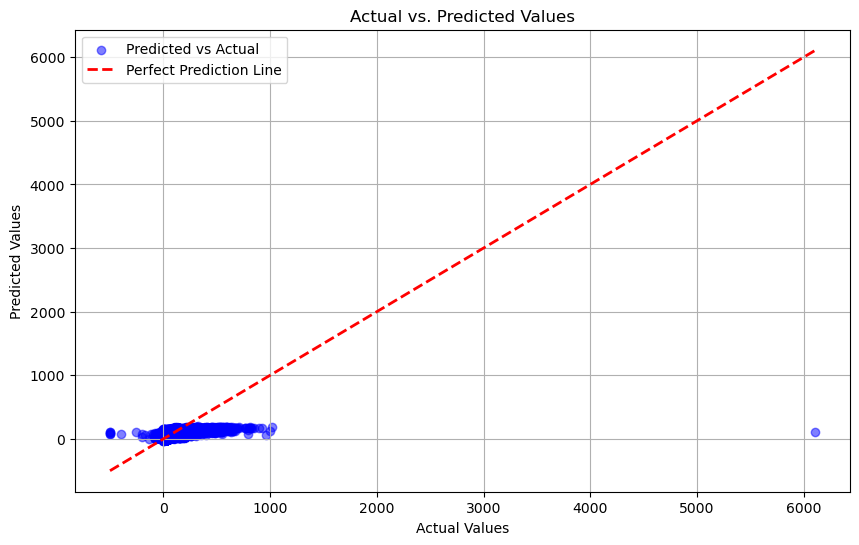

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_shift, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot a line for perfect predictions
plt.plot([y_test_shift.min(), y_test_shift.max()], [y_test_shift.min(), y_test_shift.max()], 'r--', lw=2, label='Perfect Prediction Line')

# Adding plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [14]:
#now we try with Lasso 
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [15]:
lasso = LassoCV(cv=TimeSeriesSplit(n_splits=20), random_state=42, alphas=np.logspace(-10, 10, 30))

# Fit Lasso
lasso.fit(X_train_shift, y_train_shift.values.ravel())

# Predict
y_pred_train = lasso.predict(X_train_shift)
y_pred_test = lasso.predict(X_test_shift)

# Calculate MSE
mse_train = mean_squared_error(y_train_shift, y_pred_train)
mse_test = mean_squared_error(y_test_shift, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Optimal Alpha: {lasso.alpha_}')

c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20823570.156178407, tolerance: 20178.829153272523
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47720140.69564823, tolerance: 20178.829153272523
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38870497.3569857, tolerance: 20178.829153272523
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\skle

Training MSE: 937.7260234860673
Test MSE: 996.7269259592067
Optimal Alpha: 0.00016102620275609426


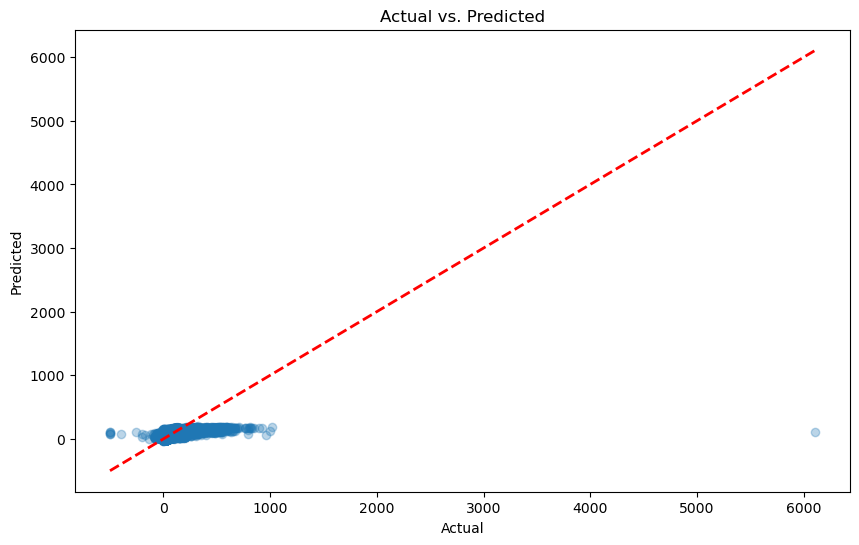

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_shift, y_pred_test, alpha=0.3)
plt.plot([y_test_shift.min(), y_test_shift.max()], [y_test_shift.min(), y_test_shift.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

Now model with interactions experiment

In [2]:
energy_features = ['biomass', 'gas', 'nuclear']
years = [f'year_{year}' for year in range(2023,2024)]
#months = [f'month_{month}' for month in range(1, 13)]

# Create interaction terms in both training and testing datasets
for energy in energy_features:
    for year in years:
        X_train_shift[f'{energy}_{year}'] = X_train_shift[energy] * X_train_shift[year]
        X_test_shift[f'{energy}_{year}'] = X_test_shift[energy] * X_test_shift[year]

    #for month in months:
        #X_train_shift[f'{energy}_{month}'] = X_train_shift[energy] * X_train_shift[month]
        #X_test_shift[f'{energy}_{month}'] = X_test_shift[energy] * X_test_shift[month]

In [4]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
import numpy as np

lasso_with_interactions = LassoCV(cv=TimeSeriesSplit(n_splits=30), random_state=42, alphas=np.logspace(-10, 10, 30))
lasso_with_interactions.fit(X_train_shift, y_train_shift.values.ravel())

# Predict using the model
y_pred_test_interactions = lasso_with_interactions.predict(X_test_shift)

# Evaluate the model
mse_test_interactions = mean_squared_error(y_test_shift, y_pred_test_interactions)
print(f'MSE with Interactions: {mse_test_interactions}')
print(f'Optimal Alpha with Interactions: {lasso_with_interactions.alpha_}')

c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14159210.312989026, tolerance: 13818.189173257804
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32926374.594395716, tolerance: 13818.189173257804
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31295247.7308392, tolerance: 13818.189173257804
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\skl

MSE with Interactions: 994.2483208749895
Optimal Alpha with Interactions: 3.290344562312671e-05


In [14]:
import joblib
import numpy as np
import pandas as pd

# Save the trained model to disk
joblib.dump(lasso_with_interactions, 'lasso_with_interactions_model.pkl')

# Convert predictions and true values to a DataFrame
predictions_df = pd.DataFrame({
    'y_true': y_test_shift.values.flatten(),  # Convert y_test_shift to NumPy array and flatten
    'y_pred': y_pred_test_interactions
})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions_lassoCV_with_interactions.csv', index=False)

# Save additional outputs if needed
np.save('mse_test_interactions.npy', mse_test_interactions)
np.save('optimal_alpha_with_interactions.npy', lasso_with_interactions.alpha_)


to load saved output 

import joblib
import pandas as pd
import numpy as np

# Load the trained model from disk
lasso_with_interactions = joblib.load('lasso_with_interactions_model.pkl')

# Load the predictions from the CSV file
predictions_df = pd.read_csv('predictions_with_interactions.csv')
y_true = predictions_df['y_true']
y_pred = predictions_df['y_pred']

# Load additional outputs if needed
mse_test_interactions = np.load('mse_test_interactions.npy')
optimal_alpha_with_interactions = np.load('optimal_alpha_with_interactions.npy')

print(f'MSE with Interactions: {mse_test_interactions}')
print(f'Optimal Alpha with Interactions: {optimal_alpha_with_interactions}')


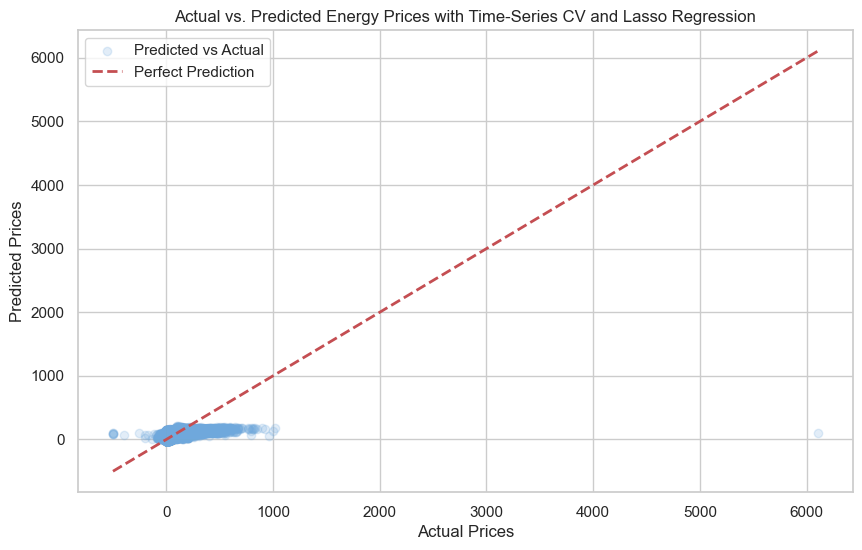

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_shift, y_pred_test_interactions, color='#6fa8dc', alpha=0.2, label='Predicted vs Actual')

# Plot a reference line for perfect predictions
plt.plot([y_test_shift.min(), y_test_shift.max()], [y_test_shift.min(), y_test_shift.max()], 'r--', lw=2, label='Perfect Prediction')

# Adding titles and labels
plt.title('Actual vs. Predicted Energy Prices with Time-Series CV and Lasso Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

# Show the plot
plt.show()